In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Assignment 3: Classification II
## Tugas
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes
- Confusion Matrix
- Visualization
- Preprocessing


**Tentang Dataset**

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Ada empat kumpulan data:
1. bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat mirip dengan data yang dianalisis di [Moro et al., 2014]
2. bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.
3. bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan input yang lebih sedikit).
4. bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

Target yang diinginkan:

**apakah klien telah berlangganan deposito berjangka? (biner: 'ya', 'tidak')**

# Preparing Data

In [2]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# labelEncoder
from sklearn.preprocessing import LabelEncoder

# scaling data
from sklearn.preprocessing import StandardScaler

# SMOTE
from imblearn.over_sampling import ADASYN

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# splitting data
from sklearn.model_selection import train_test_split

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
df = pd.read_csv("/content/drive/MyDrive/tugas_studi/bank.csv")

In [4]:
print(df.shape)

(4521, 17)


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Cleaning Data

In [7]:
df = df.rename(columns={"y": "target"})

In [8]:
label = LabelEncoder()

df['month'] = label.fit_transform(df['month'])

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000


# Exploratory Data Analysis (EDA)

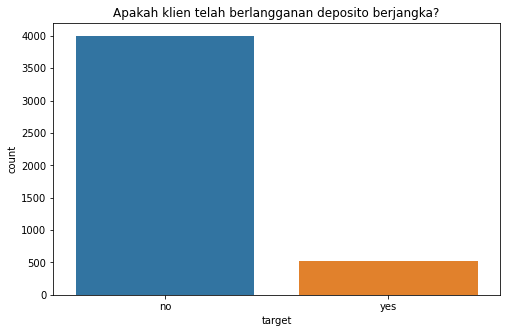

In [12]:
plt.figure(figsize=(8,5))

sns.countplot (x='target', data=df)
plt.title('Apakah klien telah berlangganan deposito berjangka?')

plt.show()

# Preprocessing Data

In [38]:
df['job'] = label.fit_transform(df['job'])
df['marital'] = label.fit_transform(df['marital'])
df['education'] = label.fit_transform(df['education'])
df['default'] = label.fit_transform(df['default'])
df['housing'] = label.fit_transform(df['housing'])
df['loan'] = label.fit_transform(df['loan'])
df['contact'] = label.fit_transform(df['contact'])
df['poutcome'] = label.fit_transform(df['poutcome'])
df['target'] = label.fit_transform(df['target'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


## Feature selection
### Correlation Analysis

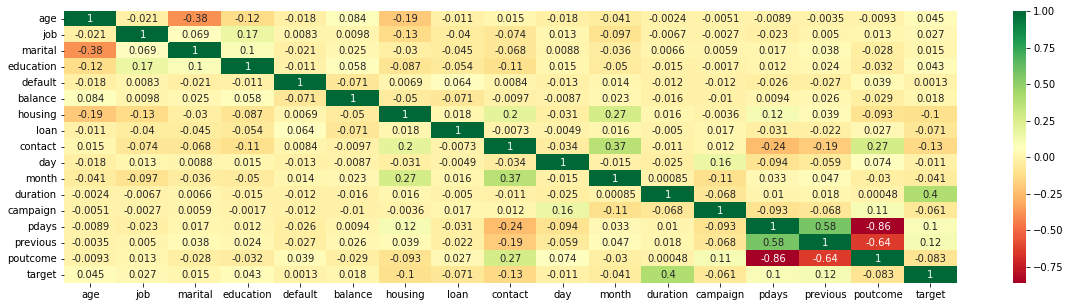

In [14]:
#obtain the correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Importance

[0.09252875 0.06534637 0.03575156 0.04631792 0.00454027 0.08623689
 0.0215092  0.01316733 0.0267848  0.08955384 0.09085625 0.2441519
 0.06018614 0.0394119  0.02987769 0.0537792 ]


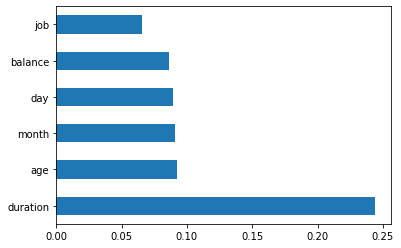

In [15]:
X = df.drop(['target'], axis=1)
y = df['target']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

# Preprocessing Data
## Feature Scaling

In [16]:
final_df = df[['duration', 'age', 'month', 'day', 'balance', 'job']]

In [17]:
scaler = StandardScaler()

X = scaler.fit_transform(final_df)
y = df['target']

## Cek keseimbangan data target.

In [18]:
df['target'].value_counts()

0    4000
1     521
Name: target, dtype: int64

Dari informasi diatas, diketahui bahwa kumpulan **data tidak seimbang**. Kita perlu menyeimbangkannya dulu sebelum melakukan modelling terhadap data.

## Mengatasi ketimpangan kelas dengan teknik oversampling kelas minoritas
Metode ini mirip dengan SMOTE tetapi menghasilkan jumlah sampel yang berbeda tergantung pada perkiraan distribusi lokal kelas yang akan di-oversampling.

In [19]:
resample = ADASYN(sampling_strategy='all', random_state=42)
X, y = resample.fit_resample(X,y)

y.value_counts()

0    4000
1    3944
Name: target, dtype: int64

## Splitting Data
Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)

(7944, 6) (6355, 6) (1589, 6)


# Modelling: Ensemble
Ensemble yaitu metode membandingkan beberapa algoritma untuk mencari algoritma terbaik yang akan kita gunakan untuk keperluan machine learning. Terdapat 6 algoritma yang akan kita perbandingkan, yaitu:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vectore Machine (SVM)
- Naive Bayes
- K-Nearest Neighbor (KNN)

In [21]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_cv = lr.predict(X_test)

In [22]:
#  Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_cv1 = dt.predict(X_test)

In [23]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_cv2 = rf.predict(X_test)

In [24]:
# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
        
pred_cv3 = svm.predict(X_test)

In [25]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

pred_cv4 = nb.predict(X_test)

In [26]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_cv5 = knn.predict(X_test)

## Model Evaluation

In [27]:
print("Logistic Regression:", accuracy_score(y_test, pred_cv))
print("Decision Tree:", accuracy_score(y_test, pred_cv1))
print("Random Forest:", accuracy_score(y_test, pred_cv2))
print("SVM:", accuracy_score(y_test, pred_cv3))
print("Naive Bayes:", accuracy_score(y_test, pred_cv4))
print("KNN:", accuracy_score(y_test, pred_cv5))

Logistic Regression: 0.7086217747010699
Decision Tree: 0.8930144745122719
Random Forest: 0.9276274386406544
SVM: 0.7935808684707363
Naive Bayes: 0.7029578351164254
KNN: 0.8842039018250472


Random Forest adalah algoritma terbaik yang menghasilkan akurasi score tertinggi.

**Jadi, algoritma yang akan kita gunakan dalam prediksi ini adalah Random Forest.**

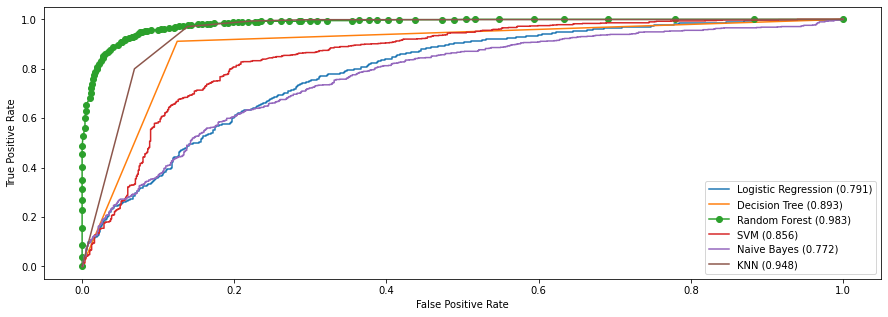

In [28]:
#define metrics
y_pred_proba1 = lr.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
auc1 = auc(fpr1, tpr1)

y_pred_proba2 = dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba2)
auc2 = auc(fpr2, tpr2)

y_pred_proba3 = rf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba3)
auc3 = auc(fpr3, tpr3)

y_pred_proba4 = svm.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba4)
auc4 = auc(fpr4, tpr4)

y_pred_proba5 = nb.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = roc_curve(y_test,  y_pred_proba5)
auc5 = auc(fpr5, tpr5)

y_pred_proba6 = knn.predict_proba(X_test)[::,1]
fpr6, tpr6, _ = roc_curve(y_test,  y_pred_proba6)
auc6 = auc(fpr6, tpr6)

#create ROC curve
plt.figure(figsize=(15,5))

plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='Decision Tree (%0.3f)' % auc2)
plt.plot(fpr3, tpr3, marker="o", label='Random Forest (%0.3f)' % auc3)
plt.plot(fpr4, tpr4, label='SVM (%0.3f)' % auc4)
plt.plot(fpr5, tpr5, label='Naive Bayes (%0.3f)' % auc5)
plt.plot(fpr6, tpr6, label='KNN (%0.3f)' % auc6)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

## Predictive System

In [40]:
''' data yang dibutuhkan pada input_data
input_data =
["duration",	"age",	"month", "day", "balance", "job"]'''

input_data = (220,	33,	8,	11, 4789,	7)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshape)
print("Apakah klien telah berlangganan deposito berjangka?")
print("")
print("Jawaban:")
print(prediction)

if (prediction[0]==0):
  print("Tidak, klien belum berlangganan deposito berjangka.")
else:
  print("Ya, klien telah berlangganan deposito berjangka.")

Apakah klien telah berlangganan deposito berjangka?

Jawaban:
[0]
Tidak, klien belum berlangganan deposito berjangka.
